# Coffee Health Dataset Visualization

This notebook provides an interactive way to explore the synthetic coffee health dataset with 10,000 records.

## Dataset Overview
The dataset contains information about coffee consumption habits and health metrics including:
- Demographics (age, gender, country)
- Coffee consumption (intake, caffeine)
- Health metrics (BMI, heart rate, sleep)
- Lifestyle factors (stress, activity, smoking, alcohol)

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up plotting style
plt.style.use('default')
sns.set_palette("Set2")
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('synthetic_coffee_health_10000.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print("\nFirst 5 rows:")
df.head()

Dataset shape: (10000, 16)

Columns: ['ID', 'Age', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level', 'Physical_Activity_Hours', 'Health_Issues', 'Occupation', 'Smoking', 'Alcohol_Consumption']

First 5 rows:


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [3]:
# Basic statistics
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)

Missing values per column:
ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64

Data types:
ID                           int64
Age                          int64
Gender                      object
Country                     object
Coffee_Intake              float64
Caffeine_mg                float64
Sleep_Hours                float64
Sleep_Quality               object
BMI                        float64
Heart_Rate                   int64
Stress_Level                object
Physical_Activity_Hours    float64
Health_Issues  

## Coffee Consumption Analysis

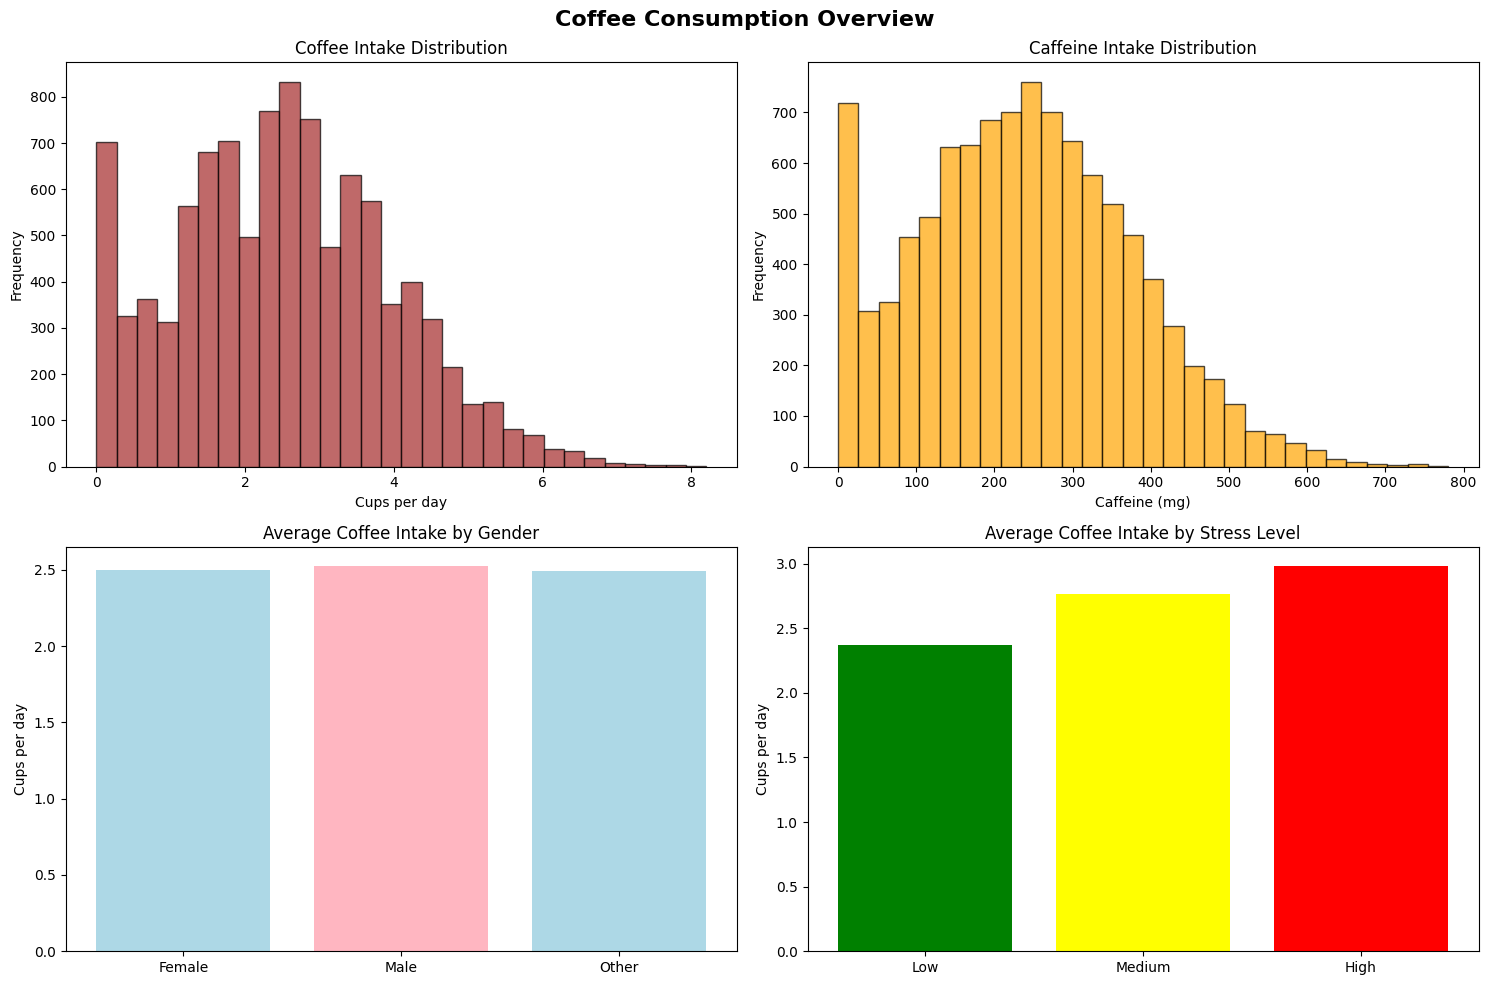

In [5]:
# Coffee consumption overview
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Coffee Consumption Overview', fontsize=16, fontweight='bold')

# Coffee intake distribution
axes[0, 0].hist(df['Coffee_Intake'], bins=30, alpha=0.7, color='brown', edgecolor='black')
axes[0, 0].set_title('Coffee Intake Distribution')
axes[0, 0].set_xlabel('Cups per day')
axes[0, 0].set_ylabel('Frequency')

# Caffeine distribution
axes[0, 1].hist(df['Caffeine_mg'], bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[0, 1].set_title('Caffeine Intake Distribution')
axes[0, 1].set_xlabel('Caffeine (mg)')
axes[0, 1].set_ylabel('Frequency')

# Coffee by gender
coffee_by_gender = df.groupby('Gender')['Coffee_Intake'].mean()
axes[1, 0].bar(coffee_by_gender.index, coffee_by_gender.values, color=['lightblue', 'lightpink'])
axes[1, 0].set_title('Average Coffee Intake by Gender')
axes[1, 0].set_ylabel('Cups per day')

# Coffee by stress level
stress_order = ['Low', 'Medium', 'High']
coffee_by_stress = df.groupby('Stress_Level')['Coffee_Intake'].mean().reindex(stress_order)
axes[1, 1].bar(coffee_by_stress.index, coffee_by_stress.values, color=['green', 'yellow', 'red'])
axes[1, 1].set_title('Average Coffee Intake by Stress Level')
axes[1, 1].set_ylabel('Cups per day')

plt.tight_layout()
plt.show()

## Health Metrics Analysis

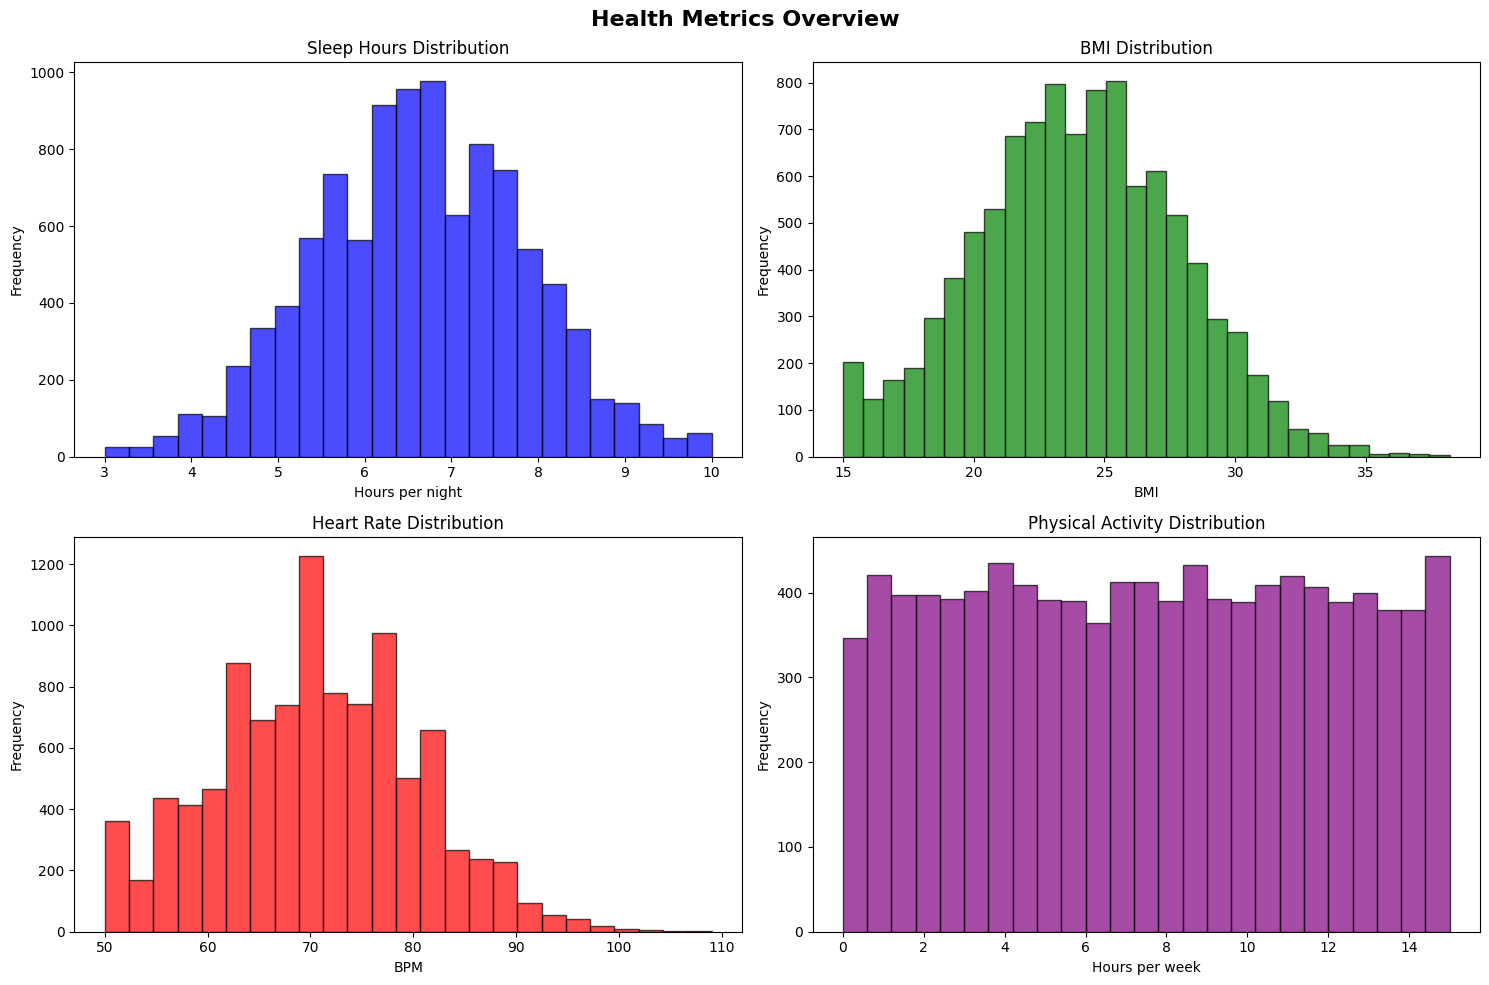

In [6]:
# Health metrics overview
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Health Metrics Overview', fontsize=16, fontweight='bold')

# Sleep hours
axes[0, 0].hist(df['Sleep_Hours'], bins=25, alpha=0.7, color='blue', edgecolor='black')
axes[0, 0].set_title('Sleep Hours Distribution')
axes[0, 0].set_xlabel('Hours per night')
axes[0, 0].set_ylabel('Frequency')

# BMI
axes[0, 1].hist(df['BMI'], bins=30, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')

# Heart rate
axes[1, 0].hist(df['Heart_Rate'], bins=25, alpha=0.7, color='red', edgecolor='black')
axes[1, 0].set_title('Heart Rate Distribution')
axes[1, 0].set_xlabel('BPM')
axes[1, 0].set_ylabel('Frequency')

# Physical activity
axes[1, 1].hist(df['Physical_Activity_Hours'], bins=25, alpha=0.7, color='purple', edgecolor='black')
axes[1, 1].set_title('Physical Activity Distribution')
axes[1, 1].set_xlabel('Hours per week')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Coffee vs Health Relationships

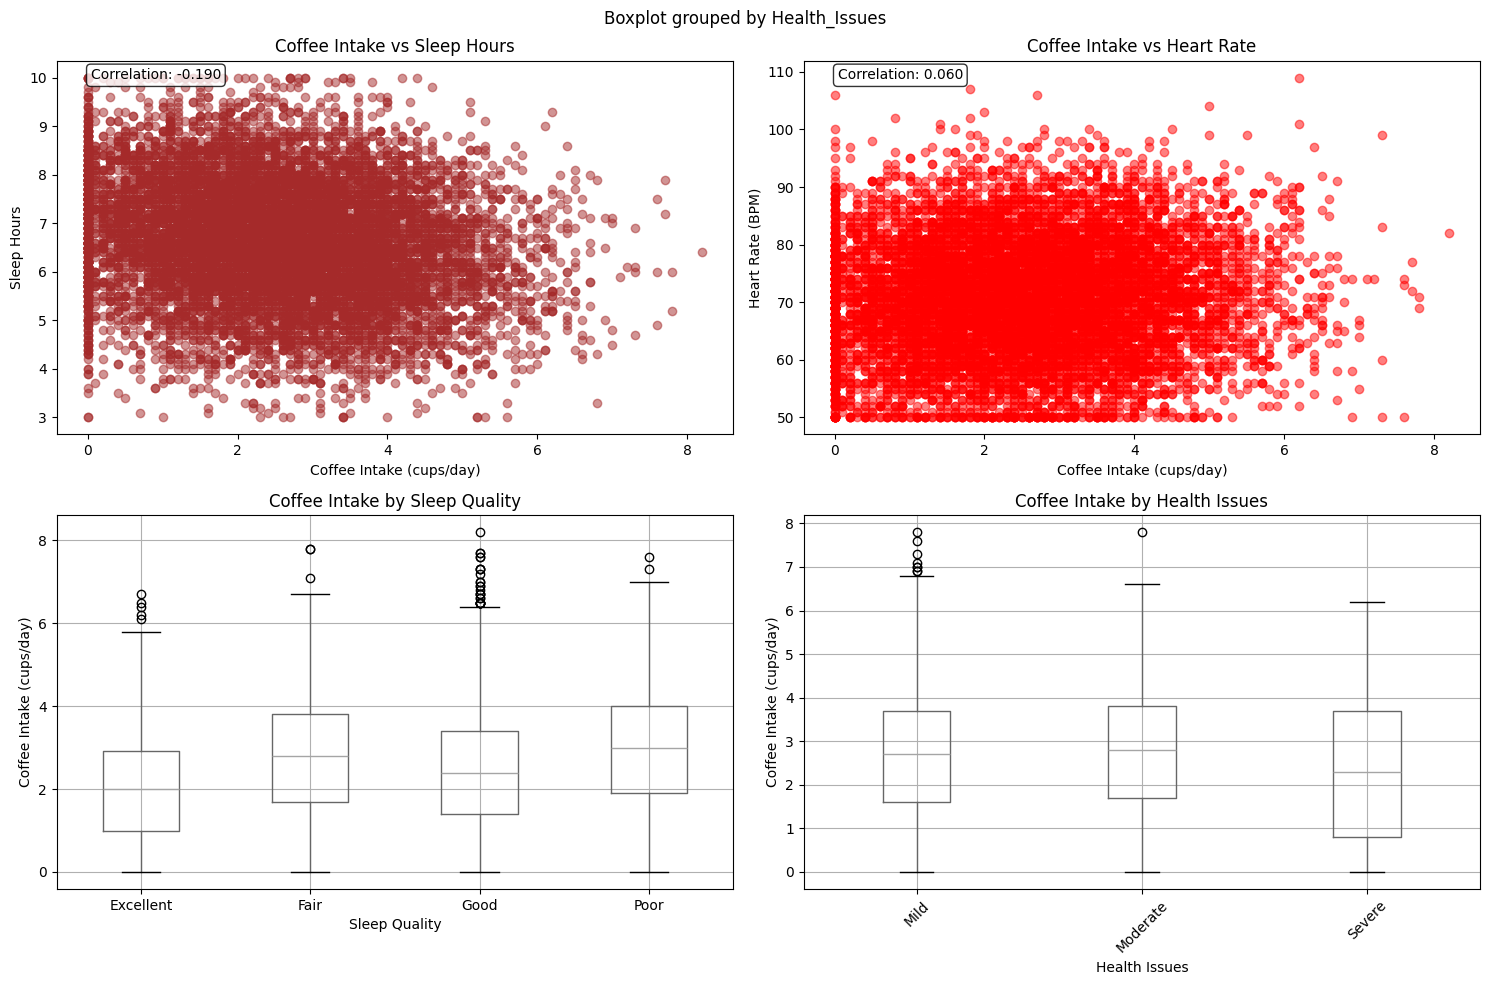

In [7]:
# Coffee vs health relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Coffee vs Health Relationships', fontsize=16, fontweight='bold')

# Coffee vs Sleep
axes[0, 0].scatter(df['Coffee_Intake'], df['Sleep_Hours'], alpha=0.5, color='brown')
axes[0, 0].set_xlabel('Coffee Intake (cups/day)')
axes[0, 0].set_ylabel('Sleep Hours')
axes[0, 0].set_title('Coffee Intake vs Sleep Hours')
corr = df['Coffee_Intake'].corr(df['Sleep_Hours'])
axes[0, 0].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[0, 0].transAxes, 
                bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))

# Coffee vs Heart Rate
axes[0, 1].scatter(df['Coffee_Intake'], df['Heart_Rate'], alpha=0.5, color='red')
axes[0, 1].set_xlabel('Coffee Intake (cups/day)')
axes[0, 1].set_ylabel('Heart Rate (BPM)')
axes[0, 1].set_title('Coffee Intake vs Heart Rate')
corr = df['Coffee_Intake'].corr(df['Heart_Rate'])
axes[0, 1].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[0, 1].transAxes,
                bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))

# Coffee by sleep quality
df.boxplot(column='Coffee_Intake', by='Sleep_Quality', ax=axes[1, 0])
axes[1, 0].set_title('Coffee Intake by Sleep Quality')
axes[1, 0].set_xlabel('Sleep Quality')
axes[1, 0].set_ylabel('Coffee Intake (cups/day)')

# Coffee by health issues
df.boxplot(column='Coffee_Intake', by='Health_Issues', ax=axes[1, 1])
axes[1, 1].set_title('Coffee Intake by Health Issues')
axes[1, 1].set_xlabel('Health Issues')
axes[1, 1].set_ylabel('Coffee Intake (cups/day)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Correlation Analysis

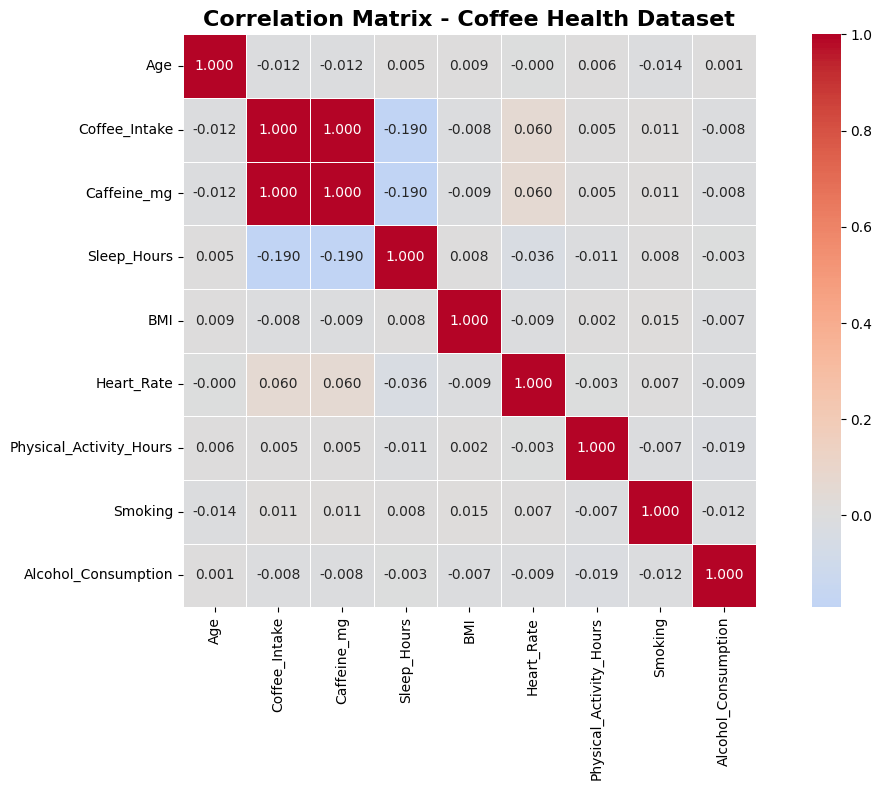

In [8]:
# Correlation heatmap
numerical_cols = ['Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 
                 'Heart_Rate', 'Physical_Activity_Hours', 'Smoking', 'Alcohol_Consumption']

corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.3f')
plt.title('Correlation Matrix - Coffee Health Dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Key Insights

In [9]:
# Print key insights
print("KEY INSIGHTS FROM THE COFFEE HEALTH DATASET")
print("=" * 50)

print(f"\n📊 Sample Size: {len(df):,} participants")
print(f"🌍 Countries: {df['Country'].nunique()} different countries")
print(f"👥 Age Range: {df['Age'].min()} - {df['Age'].max()} years")

print(f"\n☕ Coffee Consumption:")
print(f"   Average: {df['Coffee_Intake'].mean():.2f} cups/day")
print(f"   Range: {df['Coffee_Intake'].min():.1f} - {df['Coffee_Intake'].max():.1f} cups/day")
print(f"   Average Caffeine: {df['Caffeine_mg'].mean():.1f} mg/day")

print(f"\n💤 Sleep Patterns:")
print(f"   Average Sleep: {df['Sleep_Hours'].mean():.1f} hours/night")
print(f"   Most Common Sleep Quality: {df['Sleep_Quality'].mode().iloc[0]}")

print(f"\n💪 Health Metrics:")
print(f"   Average BMI: {df['BMI'].mean():.1f}")
print(f"   Average Heart Rate: {df['Heart_Rate'].mean():.1f} BPM")
print(f"   Average Physical Activity: {df['Physical_Activity_Hours'].mean():.1f} hours/week")

# Key correlations
print(f"\n🔗 Key Correlations:")
corr_coffee_sleep = df['Coffee_Intake'].corr(df['Sleep_Hours'])
corr_coffee_heart = df['Coffee_Intake'].corr(df['Heart_Rate'])
corr_activity_bmi = df['Physical_Activity_Hours'].corr(df['BMI'])

print(f"   Coffee ↔ Sleep Hours: {corr_coffee_sleep:.3f}")
print(f"   Coffee ↔ Heart Rate: {corr_coffee_heart:.3f}")
print(f"   Physical Activity ↔ BMI: {corr_activity_bmi:.3f}")

# Health issues breakdown
print(f"\n🏥 Health Issues Distribution:")
health_dist = df['Health_Issues'].value_counts(normalize=True) * 100
for health, pct in health_dist.items():
    print(f"   {health}: {pct:.1f}%")

KEY INSIGHTS FROM THE COFFEE HEALTH DATASET

📊 Sample Size: 10,000 participants
🌍 Countries: 20 different countries
👥 Age Range: 18 - 80 years

☕ Coffee Consumption:
   Average: 2.51 cups/day
   Range: 0.0 - 8.2 cups/day
   Average Caffeine: 238.4 mg/day

💤 Sleep Patterns:
   Average Sleep: 6.6 hours/night
   Most Common Sleep Quality: Good

💪 Health Metrics:
   Average BMI: 24.0
   Average Heart Rate: 70.6 BPM
   Average Physical Activity: 7.5 hours/week

🔗 Key Correlations:
   Coffee ↔ Sleep Hours: -0.190
   Coffee ↔ Heart Rate: 0.060
   Physical Activity ↔ BMI: 0.002

🏥 Health Issues Distribution:
   Mild: 88.2%
   Moderate: 11.4%
   Severe: 0.4%
